# EDA

## 前処理

In [1]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

In [2]:
feature = pd.read_csv("./features.csv.zip", parse_dates=True)
stores = pd.read_csv("./stores.csv")
train = pd.read_csv("./train.csv.zip", parse_dates=True)
test = pd.read_csv("./test.csv.zip", parse_dates=True)
sample = pd.read_csv("./sampleSubmission.csv.zip")

In [3]:
train_all = pd.merge(pd.merge(train, stores), feature)
test_all = pd.merge(pd.merge(test, stores), feature)
X_all = pd.concat([train_all, test_all], sort = False, ignore_index=True)

In [4]:
train_all.Date = pd.to_datetime(train_all.Date)
test_all.Date = pd.to_datetime(test_all.Date)
train_all["Year"] = train_all.Date.dt.year
train_all["Week"] = train_all.Date.dt.week
test_all["Year"] = test_all.Date.dt.year
test_all["Week"] = test_all.Date.dt.week
train_all.drop(["Date"], axis=1, inplace=True)
test_all.drop(["Date"], axis=1, inplace=True)

## shape, 欠損値の確認

In [5]:
print("Train:" + str(train.shape))
print("Test:" + str(test.shape))
print("Feature:" + str(feature.shape))
print("Stores:" + str(stores.shape))

Train:(421570, 5)
Test:(115064, 4)
Feature:(8190, 12)
Stores:(45, 3)


In [6]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [8]:
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [10]:
train_all.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Week                 0
dtype: int64

In [11]:
test_all.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Year                0
Week                0
dtype: int64

## データの可視化と分析

### trainの可視化

In [12]:
pdp.ProfileReport(train_all)

Number of variables,17
Number of observations,421570
Total Missing (%),19.8%
Total size in memory,55.1 MiB
Average record size in memory,137.0 B
Numeric,15
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [13]:
train_all.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,25.826762
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,14.151887
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,14.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,26.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,38.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,52.000000


以下の結果からWeeklySalesとMarkdown1~4にそれほど相関がないのでMarkdownのデータを削除しても良いかと考えたが

In [14]:
train_all.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,0.002997,0.001031
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,0.003738,0.000882
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,-0.010111,0.027673
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,-0.056746,0.128184
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238,-0.004975,-0.001292
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,0.065814,0.236276
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.779633,-0.031140
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.141332,-0.198076
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,-0.222109,-0.000995
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,-0.319162,0.196307


下のようにDeptによってはWeekly_SalesとMarkdownに相関があるところもあるので削除はしないでおく

In [15]:
train_all[train_all.Dept==6].corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
Store,1.000000,NaN,-0.238279,0.003549,-0.142170,-0.079234,0.038601,-0.080246,-0.024321,-0.026577,-0.003317,0.003419,-0.205241,0.225134,-0.018443,0.009839
Dept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,-0.238279,NaN,1.000000,0.191073,0.351794,-0.156350,-0.125744,0.011798,0.081101,0.619920,-0.039096,0.068440,-0.167616,-0.017437,-0.240324,0.212181
IsHoliday,0.003549,NaN,0.191073,1.000000,-0.003548,-0.157265,-0.078825,-0.037862,0.336526,0.429664,0.000321,-0.056407,-0.000006,0.011787,-0.055934,0.127468
Size,-0.142170,NaN,0.351794,-0.003548,1.000000,-0.028060,0.045305,0.316479,0.102363,0.045104,0.166696,0.289445,-0.038705,-0.082594,0.023779,-0.012197
Temperature,-0.079234,NaN,-0.156350,-0.157265,-0.028060,1.000000,0.128359,-0.018922,-0.323744,-0.096279,-0.062052,-0.000099,0.208909,0.101721,0.058605,0.239826
Fuel_Price,0.038601,NaN,-0.125744,-0.078825,0.045305,0.128359,1.000000,0.087097,-0.219662,-0.101851,-0.040489,-0.116163,-0.161927,-0.021432,0.781899,-0.038913
MarkDown1,-0.080246,NaN,0.011798,-0.037862,0.316479,-0.018922,0.087097,1.000000,0.020266,-0.109889,0.819027,0.146855,-0.074844,0.046830,0.146280,-0.205906
MarkDown2,-0.024321,NaN,0.081101,0.336526,0.102363,-0.323744,-0.219662,0.020266,1.000000,-0.050042,-0.007602,-0.009230,-0.044427,0.021886,-0.224563,-0.005677
MarkDown3,-0.026577,NaN,0.619920,0.429664,0.045104,-0.096279,-0.101851,-0.109889,-0.050042,1.000000,-0.070213,-0.027132,-0.026322,0.012730,-0.323084,0.197690


In [16]:
train_all[train_all.Store==3].corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,1.000000,-0.074147,0.001108,NaN,-0.007391,0.002003,-0.001852,0.006991,0.005229,0.000982,0.006978,0.006853,-0.003943,0.003942,0.006773
Weekly_Sales,NaN,-0.074147,1.000000,0.010466,NaN,-0.014544,0.007844,0.000749,-0.009748,0.022541,0.006622,0.007139,0.015105,-0.010430,0.012344,0.008447
IsHoliday,NaN,0.001108,0.010466,1.000000,NaN,-0.184272,-0.085562,0.002090,0.367265,0.482373,-0.008741,-0.043863,-0.026910,0.044531,-0.055543,0.127395
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,-0.007391,-0.014544,-0.184272,NaN,1.000000,0.274763,-0.093218,-0.483476,-0.042152,-0.076394,-0.294793,0.148687,-0.136861,0.100988,0.247900
Fuel_Price,NaN,0.002003,0.007844,-0.085562,NaN,0.274763,1.000000,0.079975,-0.314826,-0.183476,0.008541,-0.262888,0.755247,-0.387965,0.810654,-0.090115
MarkDown1,NaN,-0.001852,0.000749,0.002090,NaN,-0.093218,0.079975,1.000000,0.017679,-0.200671,0.584688,0.059450,-0.124210,0.095774,0.144933,-0.320770
MarkDown2,NaN,0.006991,-0.009748,0.367265,NaN,-0.483476,-0.314826,0.017679,1.000000,-0.068555,-0.114707,-0.026668,-0.317226,0.317534,-0.219670,-0.041141
MarkDown3,NaN,0.005229,0.022541,0.482373,NaN,-0.042152,-0.183476,-0.200671,-0.068555,1.000000,-0.126188,-0.131405,-0.307210,0.248423,-0.336131,0.210088


### 他の特徴量とWeekly_Salesの関係をプロット

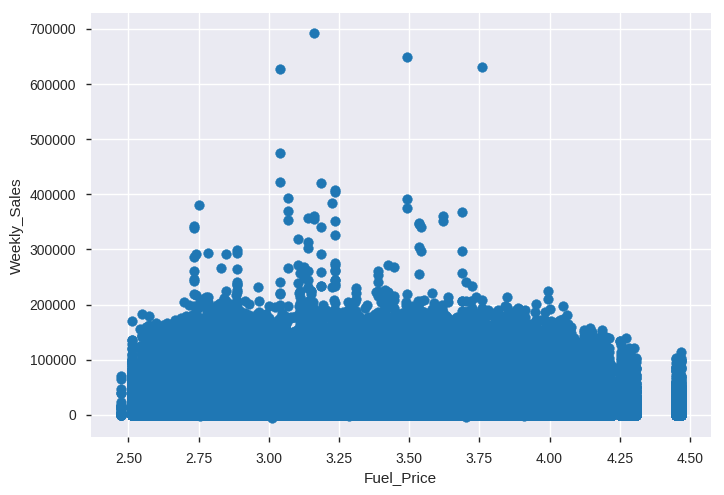

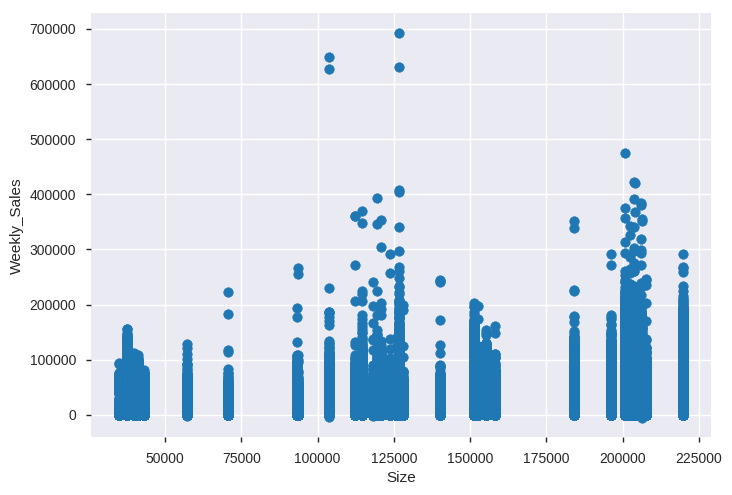

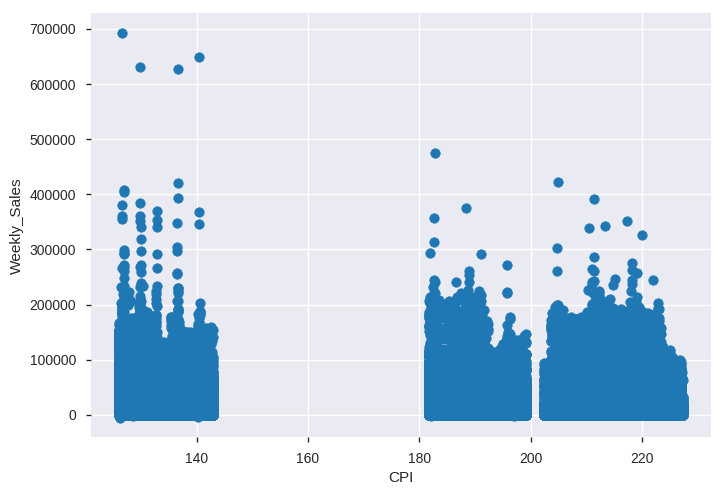

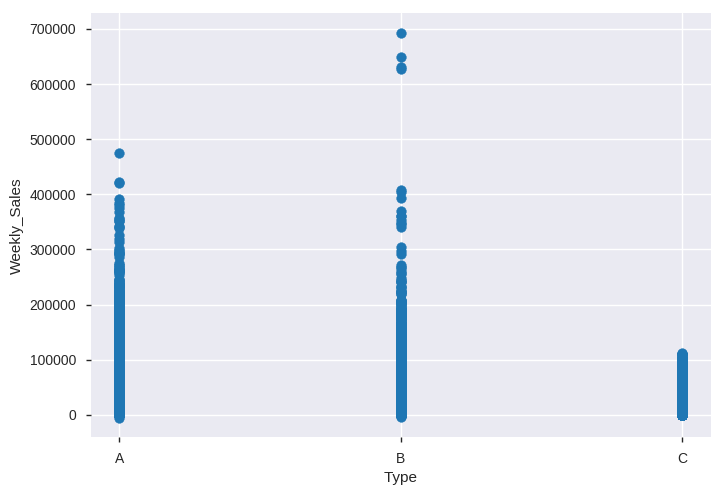

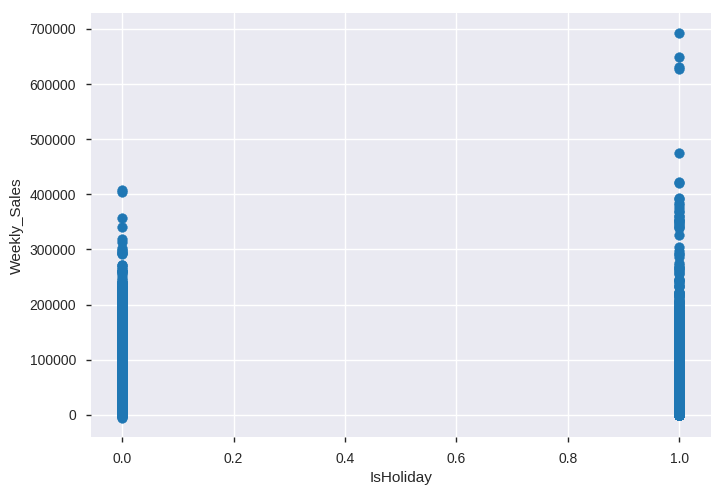

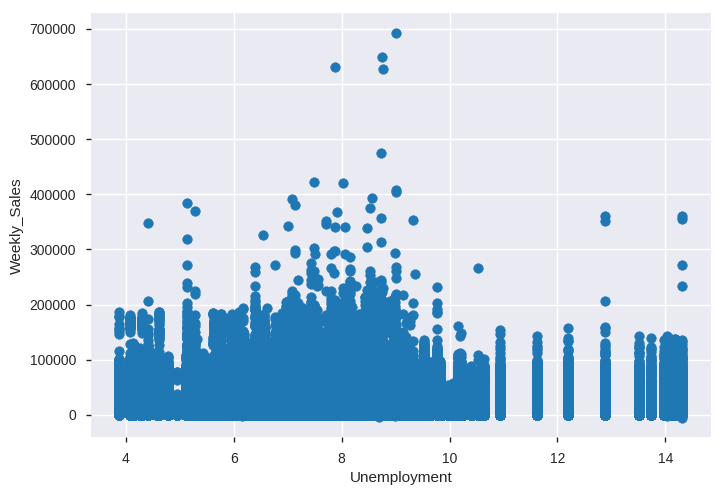

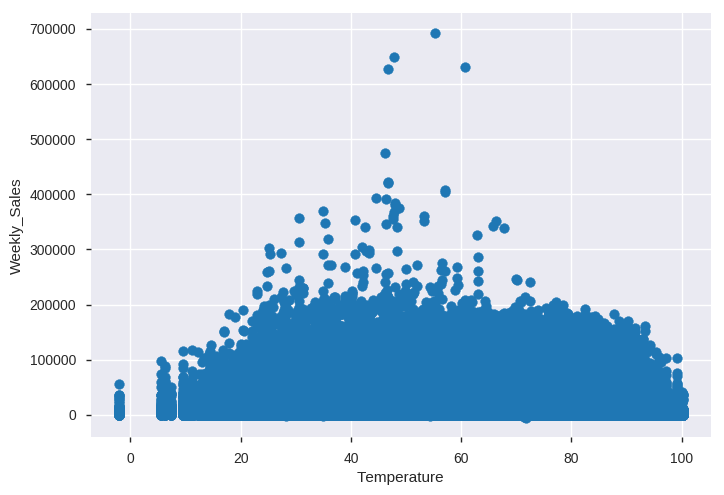

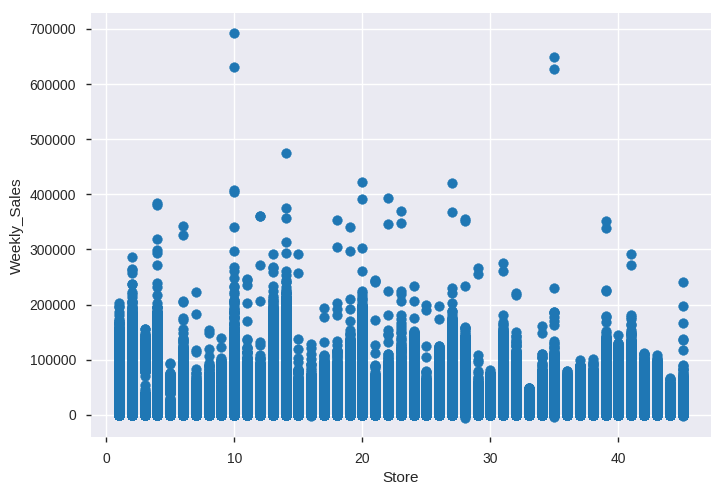

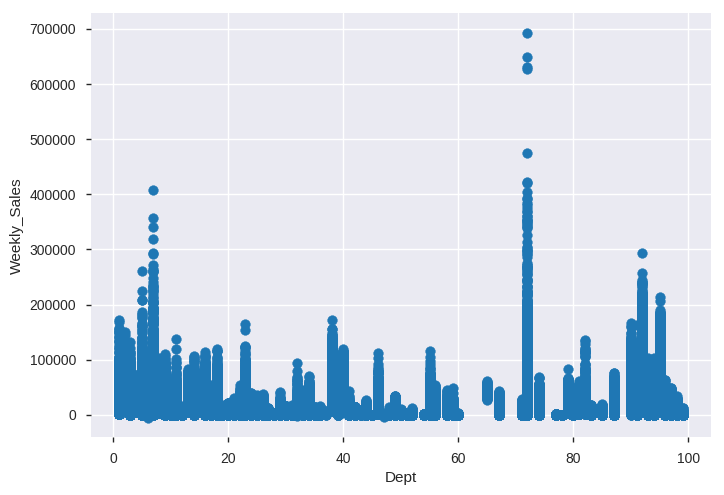

In [17]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

scatter(train_all, 'Fuel_Price')
scatter(train_all, 'Size')
scatter(train_all, 'CPI')
scatter(train_all, 'Type')
scatter(train_all, 'IsHoliday')
scatter(train_all, 'Unemployment')
scatter(train_all, 'Temperature')
scatter(train_all, 'Store')
scatter(train_all, 'Dept')

### Testデータの可視化

In [18]:
pdp.ProfileReport(test_all)

Number of variables,16
Number of observations,115064
Total Missing (%),6.9%
Total size in memory,14.2 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,1
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [19]:
df = pd.concat([train_all, test_all], axis=0, sort=False)

In [20]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
count,536634.000000,536634.000000,421570.000000,536634.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,498472.000000,498472.000000,536634.000000,536634.000000
mean,22.208621,44.277301,15981.258123,136678.550960,58.771762,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,172.090481,7.791888,2011.354241,25.231581
std,12.790580,30.527358,22711.183519,61007.711799,18.678716,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,39.542149,1.865076,1.040218,14.554119
min,1.000000,1.000000,-4988.940000,34875.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,45.250000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,132.521867,6.623000,2010.000000,13.000000
50%,22.000000,37.000000,7612.030000,140167.000000,60.060000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,182.442420,7.795000,2011.000000,24.000000
75%,33.000000,74.000000,20205.852500,202505.000000,73.230000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,213.748126,8.549000,2012.000000,37.000000
max,45.000000,99.000000,693099.360000,219622.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,2013.000000,52.000000


### 2010年を例にWeekly_Salesの可視化をする

2010年かつStoreが1のデータに関してDeptごとにWeekly_Salesを可視化<br>
赤いプロットはIs_Holiday == Trueの週

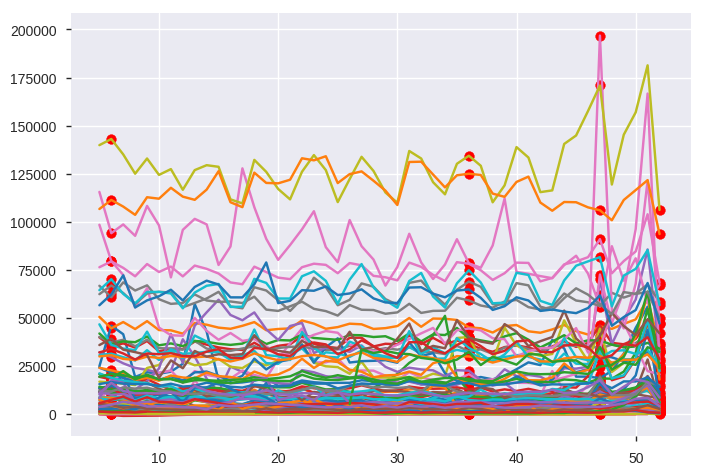

In [21]:
for i in train_all[(train_all.Year == 2010) & (train_all.Store == 1)].loc[:, ["Store", "Dept", "Weekly_Sales", "Week", "IsHoliday"]].groupby("Dept"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

2010年かつDeptが1,2,3のデータに関してStoreごとにWeekly_Salesを可視化<br>
赤いプロットはIs_Holiday == Trueの週<br>
このグラフからStoreは違ってもがDeptが同じであれば販売数の傾向が似ることがわかる。<br>またIs_Holiday==Trueの前に売り上げが急激に増える傾向にある

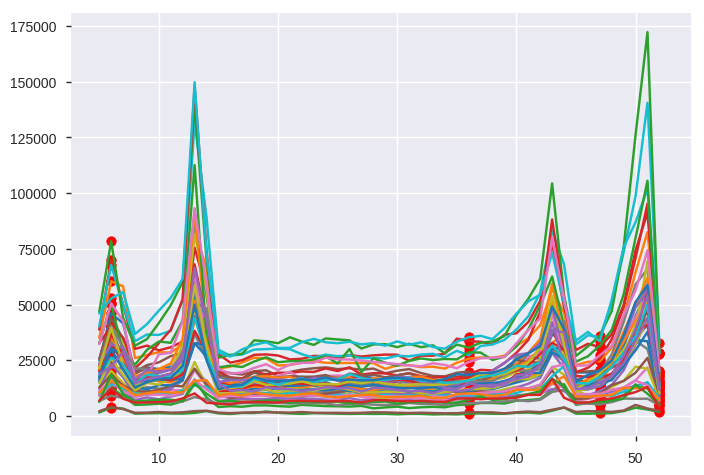

In [22]:
for i in train_all[(train_all.Year == 2010) & (train_all.Dept == 1)].loc[:, ["Store", "Dept", "Weekly_Sales", "Week", "IsHoliday"]].groupby("Store"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

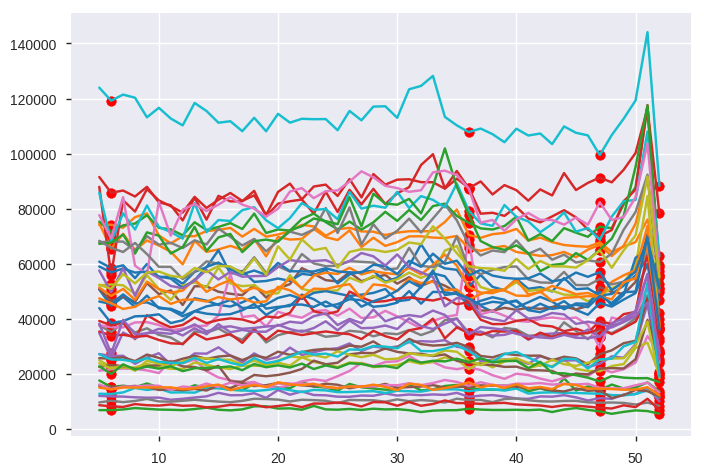

In [23]:
for i in train_all[(train_all.Year == 2010) & (train_all.Dept == 2)].loc[:, ["Store", "Dept", "Weekly_Sales", "Week", "IsHoliday"]].groupby("Store"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

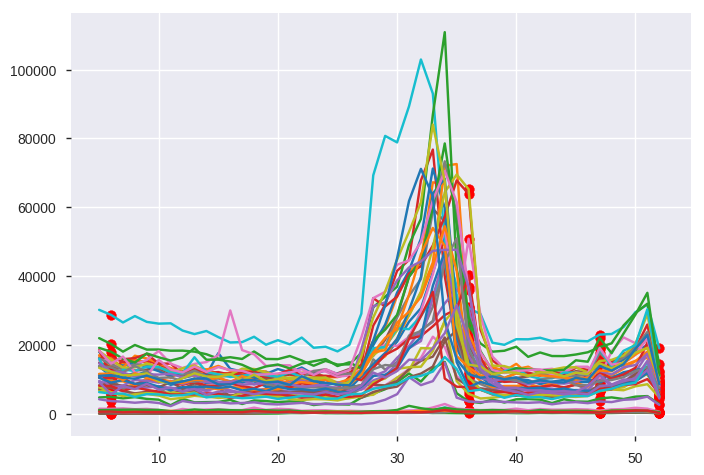

In [24]:
for i in train_all[(train_all.Year == 2010) & (train_all.Dept == 3)].loc[:, ["Store", "Dept", "Weekly_Sales", "Week", "IsHoliday"]].groupby("Store"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

### 同じStore, Deptで2010, 2011, 2012年のWeekly_Salesをプロット

以下の結果から年が異なってもWeekly_Salesは似たような変動をすることがわかる。

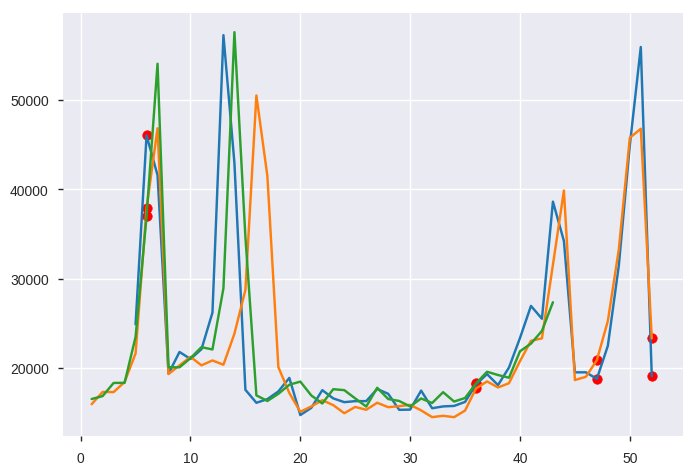

In [25]:
for i in train_all[(train_all.Store == 1) & (train_all.Dept == 1)].loc[:, ["Store", "Dept", "Weekly_Sales", "Year", "Week", "IsHoliday"]].groupby("Year"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

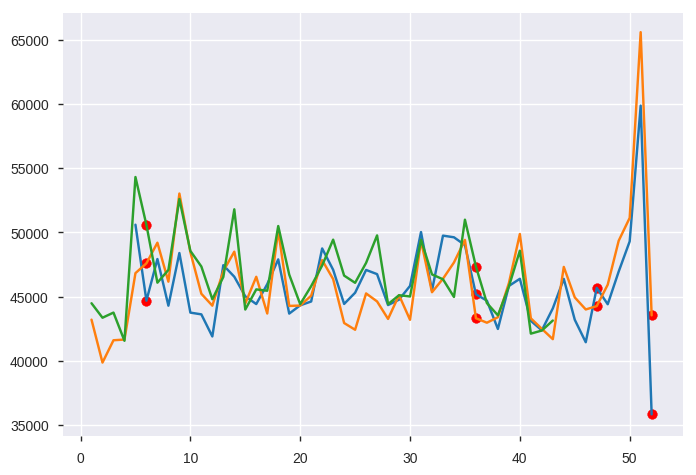

In [26]:
for i in train_all[(train_all.Store == 1) & (train_all.Dept == 2)].loc[:, ["Store", "Dept", "Weekly_Sales", "Year", "Week", "IsHoliday"]].groupby("Year"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

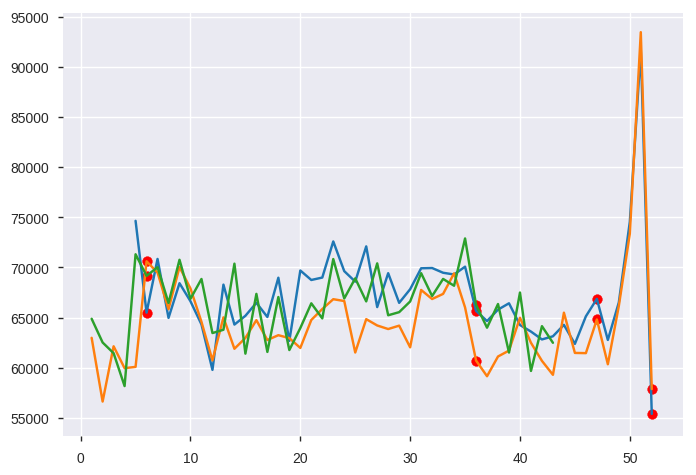

In [27]:
for i in train_all[(train_all.Store == 2) & (train_all.Dept == 2)].loc[:, ["Store", "Dept", "Weekly_Sales", "Year", "Week", "IsHoliday"]].groupby("Year"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

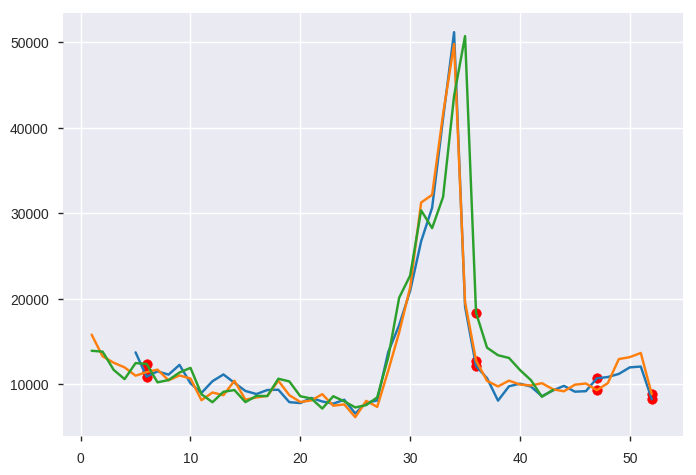

In [28]:
for i in train_all[(train_all.Store == 1) & (train_all.Dept == 3)].loc[:, ["Store", "Dept", "Weekly_Sales", "Year", "Week", "IsHoliday"]].groupby("Year"):
    plt.plot(i[1].Week, i[1].Weekly_Sales)
    plt.scatter(i[1][i[1].IsHoliday == 1].Week, i[1][i[1].IsHoliday == 1].Weekly_Sales, color = "red")

これまでの分析結果からDeptごとにWeekly_Salesは似ており、年はそれほど大きな影響を与えないことが分かったので、予測モデルを作成する時はDeptごとにデータを分割して、それぞれに対して予測モデルを構築した方が良いと考えるようになる。

### Deptごとのデータに関して

train. test共にDeptごとのデータ数に偏りがあることがわかる。<br>データがあまりにも少ないDeptに関してはこれ単体に予測モデルを作っても精度が出にくいと考えられる<br>⇨全データで学習したモデルとDeptごとに学習したモデルで、Deptごとに精度を比較して精度の良い方を予測モデルとして使うという方針も考えられる

In [29]:
train_all.Dept.value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
16    6435
14    6435
13    6435
79    6435
81    6435
46    6435
82    6435
8     6435
90    6435
91    6435
92    6435
7     6435
4     6435
95    6435
3     6435
2     6435
40    6435
11    6434
74    6430
17    6412
12    6409
42    6401
87    6391
9     6354
25    6354
      ... 
55    5596
22    5543
44    5471
24    5406
41    5393
33    5390
34    5326
71    5309
29    5308
35    5297
36    5295
30    5291
18    5029
96    4854
54    4767
49    4482
58    4390
19    4119
37    2577
45    1936
48    1742
50    1562
51    1394
99     862
47     646
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [30]:
test_all.Dept.value_counts()

1     1755
13    1755
91    1755
90    1755
21    1755
38    1755
82    1755
40    1755
81    1755
16    1755
79    1755
14    1755
46    1755
95    1755
12    1755
11    1755
10    1755
8     1755
7     1755
4     1755
67    1755
3     1755
2     1755
92    1755
9     1754
60    1754
42    1754
74    1751
5     1738
17    1736
      ... 
33    1497
24    1496
55    1496
49    1490
44    1489
29    1481
94    1464
18    1451
71    1448
30    1447
34    1444
35    1442
36    1442
41    1433
96    1350
58    1212
19    1208
54    1014
37     703
99     613
48     573
50     422
45     163
47     119
39      43
65      39
77       6
78       5
51       4
43       3
Name: Dept, Length: 81, dtype: int64

### IsHolidayとWeekly_Salesの関係に関して

In [31]:
train_all[train_all.IsHoliday == True].Week.value_counts()

6     8895
36    8861
47    5959
52    5946
Name: Week, dtype: int64

売上の多い週は47週目と51週目に集中していることから、IsHolidayに加えて47週目と51週目には別の列を付け加えた方が良いかもしれない<br>

In [32]:
train_all[train_all.Weekly_Sales > 300000].Week.value_counts()

47    27
51     7
Name: Week, dtype: int64

In [33]:
train_all[train_all.Weekly_Sales > 300000].Dept.value_counts()

72    30
7      4
Name: Dept, dtype: int64

In [34]:
train_all[train_all.Weekly_Sales > 200000].Dept.value_counts()

72    77
92    51
7     29
5      4
95     2
Name: Dept, dtype: int64

売上の少ない週は売上数だけでは特定できない

In [35]:
len(train_all[train_all.Weekly_Sales < 100].Week.value_counts())

52

### 売上のdiffについて

In [36]:
diff_1_1 = train_all[(train_all.Store==1) & (train_all.Dept==1)].Weekly_Sales.diff().dropna().values

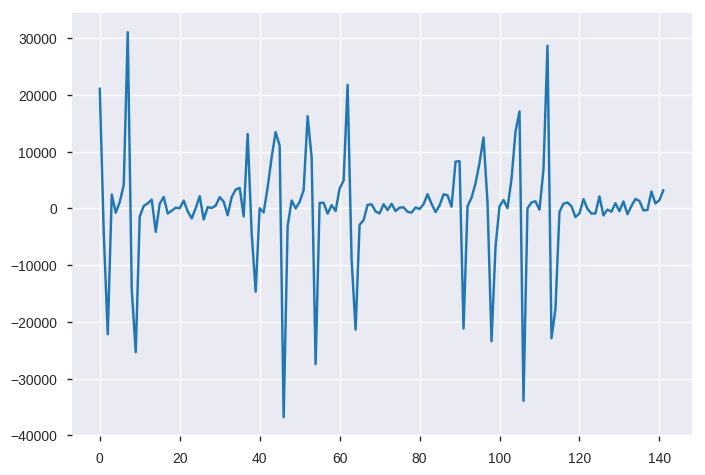

In [37]:
plt.plot(diff_1_1)

In [38]:
ts_acf = sm.tsa.stattools.acf(diff_1_1, nlags=40)

In [39]:
ts_pacf = sm.tsa.stattools.pacf(diff_1_1, nlags=40, method='ols')

/misc/home/misu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


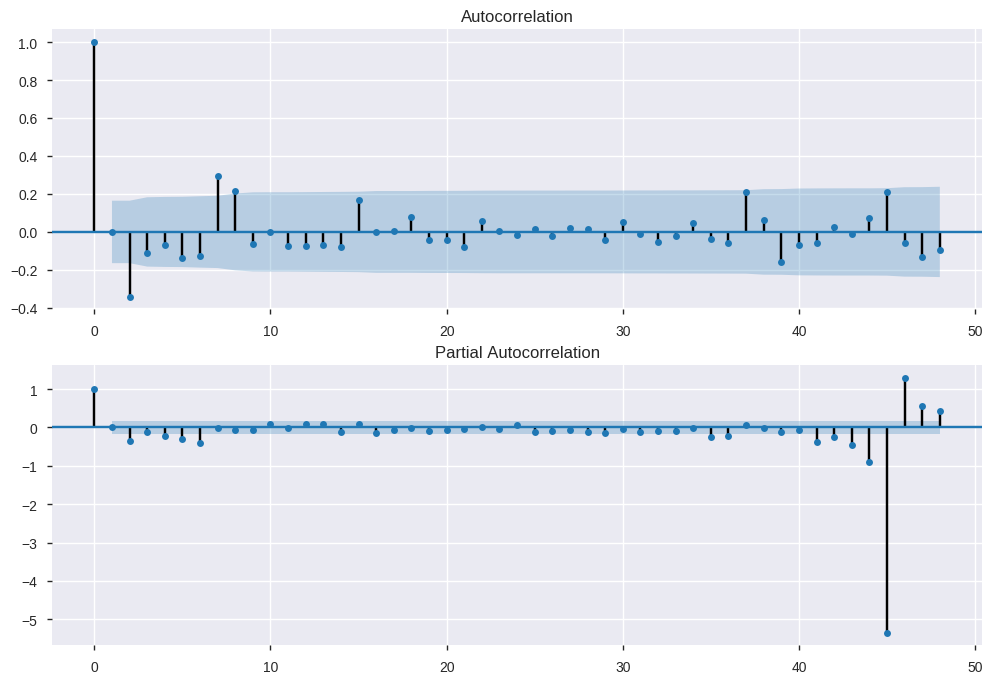

In [40]:
#  自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_1_1, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_1_1, lags=48, ax=ax2)

# 予測に向けた考察のまとめ

- Weekly_SalesはStore, Yearによる変動はそれほど大きくなく、Deptごとに異なる変動の特徴が見られた。
   - DeptごとにかなりWeekly_Salesの特徴があるので、決定木を使用している予測モデルを作成した方が良さそう
   - 予測モデルはDeptごとに作成した方がもしかしたら精度が上がるかもしれない
   
- 全データで見るとWeekly_Salesと一見相関の低い特徴量もStore,Deptによっては相関が見られるので削除はしない方が良い
- featureの欠損値の補完方法に関して：Storeごとの平均値を用いて、対応するStoreの欠損を補完する、Deptごとの平均値を用いて、対応するStoreの欠損を補完するのが良いと考えた。Store, DeptによってはMarkDownの値とWeekly_Salesの相関があるため。
- 47週目と51週目に急激にWeekly_Salesが増加しているところがあるので、IsHolidayの列とは別に47週目と51週目のデータにはラベルをつけた方が良い。売上の少ない週は特定できない。
- 大幅な外れ値は見当たらないので欠損値の除外は行わない